# EDA по данным риелторской компании

Внутри увидите пустой Jupyter Notebook и файл clients.csv В файле предоставленна информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Дата Сайнс сделать следующее:
    
Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).
    
Таким образом после вашего анализа, я хочу увидеть небольшое описание нашего целевого клиента с соответствующими визуализациями, что мы прошли с вами на лекции.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%config InlineBackend.figure_format = 'svg' 

df = pd.read_csv('clients.csv')
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


Посмотрим столбцы нашего датасета

In [2]:
df.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval ',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

Столбец Age Interval имеет лишний пробел в названии, заменим это.

In [3]:
df.columns = ['Age Interval' if col == 'Age Interval ' else col for col in df.columns]

Посмотрим пустые значения в датасете

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

Создадим DataFrame c пустыми значениями чтобы оценить их степень важности

In [5]:
empty_values = df[df['Age at time of purchase'].isna() | df['Age Interval'].isna() | df['Y'].isna() | df['M'].isna() | df['D'].isna() | df['Gender'].isna() | df['State'].isna()]

In [6]:
empty_values[['Name','Surname','Age at time of purchase','Age Interval','Y', 'M', 'D','Gender','State','Country','Entity']]

,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,State,Country,Entity
41,Lauryn,Patrick,36.0,36-45,1969.0,10.0,30.0,F,NaN,Belgium,Individual
58,Aleksandra,Karenina,40.0,36-45,1967.0,6.0,13.0,F,NaN,Russia,Individual
64,Alejandra,Greer,41.0,36-45,1965.0,1.0,11.0,F,NaN,Denmark,Individual
76,Diego,Mendez,42.0,36-45,1965.0,5.0,12.0,M,NaN,Mexico,Individual
114,Piotr,Aleksandrov,51.0,46-55,1955.0,12.0,2.0,M,NaN,Russia,Individual
139,Elena,Petrova,57.0,56-65,1949.0,6.0,22.0,F,NaN,Russia,Individual
146,Xavier,Faulkner,60.0,56-65,1947.0,5.0,24.0,M,NaN,Canada,Individual
147,Xavier,Faulkner,60.0,56-65,1947.0,5.0,24.0,M,NaN,Canada,Individual
148,Xavier,Faulkner,60.0,56-65,1947.0,5.0,24.0,M,NaN,Canada,Individual
149,Xavier,Faulkner,60.0,56-65,1947.0,5.0,24.0,M,NaN,Canada,Individual


Как мы видим, данные о гендере и возрасте не указаны для типов клиентов - юридические лица.
Значение штата отсутствует для всех стран, кроме США.

### Какой пол и возраст у клиентов риелторской компании ? 

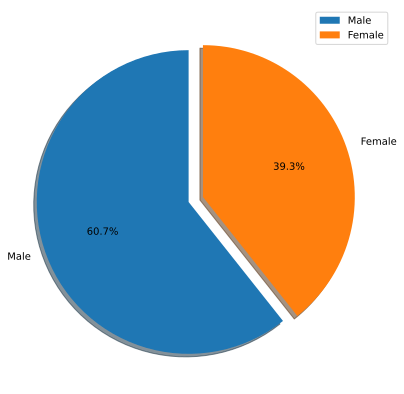

In [7]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.legend()
plt.show()

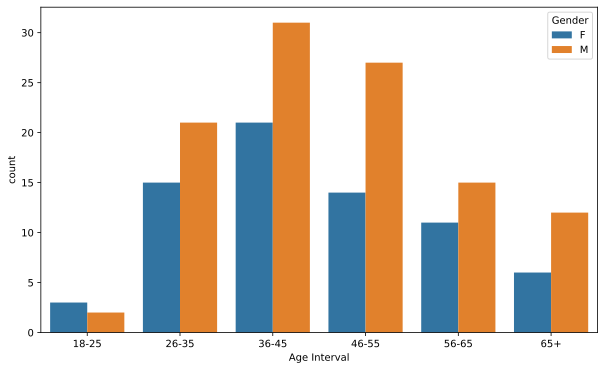

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Age Interval',hue = 'Gender', data = df);

Как мы видим, что самые частые клиенты компании - это люди в возрасте 36 до 45, преимущественно, мужчины. Причем во всех категориях возраста, кроме самой младшей, мужчины завершают сделок больше.

### Какое гражданство имеют клиенты компании ? 

In [9]:
df['Country'].value_counts()

USA        165
USA         12
Canada       7
Russia       4
UK           2
Belgium      2
Denmark      1
Germany      1
Mexico       1
Name: Country, dtype: int64

В значении USA есть лишний пробел, уберем его.

In [10]:
df['Country'] = df['Country'].replace('USA ', 'USA', regex=True).astype(str)

In [11]:
df['Country'].value_counts(normalize = True)

USA        0.907692
Canada     0.035897
Russia     0.020513
UK         0.010256
Belgium    0.010256
Denmark    0.005128
Germany    0.005128
Mexico     0.005128
Name: Country, dtype: float64

Больше 90 процентов клиентов компании являются гражданами США.

### Какой тип недвижимости покупают чаще? 

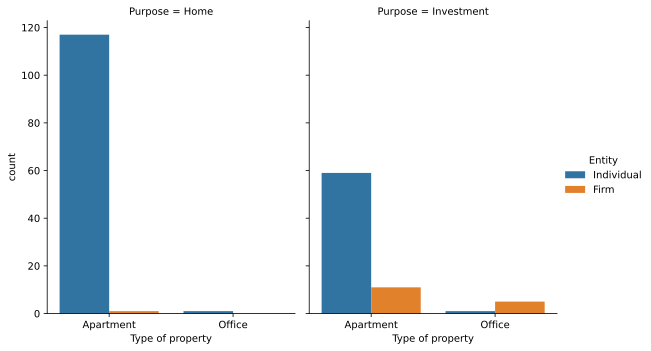

In [12]:
sns.catplot(x="Type of property", hue="Entity", col="Purpose", data=df, kind="count", height=5, aspect=.8);

Самые частые сделки компании - это сделки с физическими лицами, которые покупают себе тип недвижимости - квартира, в основном с целью проживания, а не инвестиции.

### По какой площади и цене покупаются квартиры? 

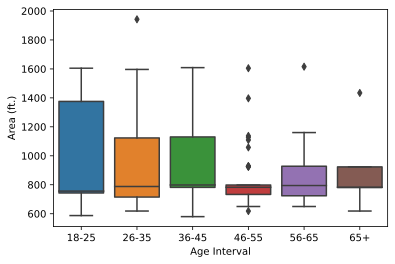

In [13]:
sns.boxplot(y="Area (ft.)", x = 'Age Interval', data=df.loc[df['Type of property'] == 'Apartment']);

Пофиксим столбец Price, чтобы иметь возможность сравнивать числа

In [14]:
df['Price'] = [elem/100 for elem in df['Price'].replace('[\$\,\.]', '', regex=True).astype(int)]

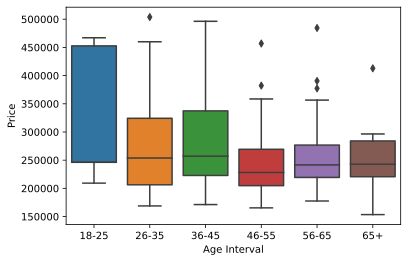

In [15]:
sns.boxplot(y="Price", x = 'Age Interval', data=df.loc[df['Type of property'] == 'Apartment']);

В боксах указаны медианные значения площади и цены покупаемой недвижимости по категориям возрастов.

### Какой источник лида самый эффективный? 

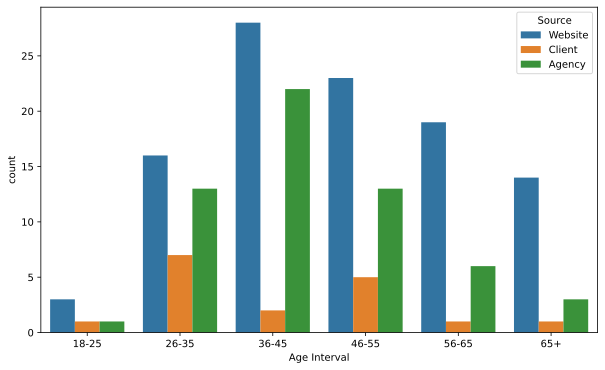

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Age Interval',hue = 'Source', data = df);

Стоит отметить, что в количественном значении, веб-сайт является самым продуктивным источником лидов. Также удивителен тот факт, что веб-сайт является фаворитом в каждой из групп возрастов, что говорит о том, что пожилые и взрослые люди активно работают в Интернете.

### Покупатели пользуются ипотекой при покупке?

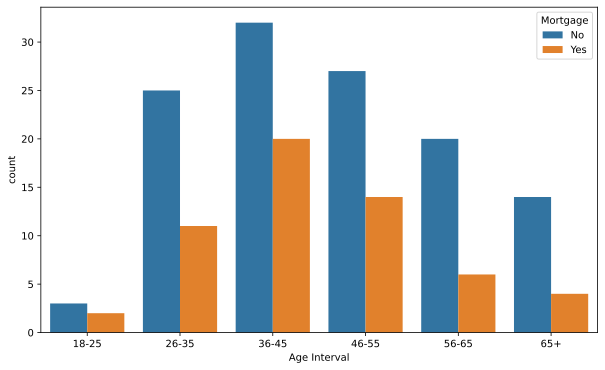

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Age Interval',hue = 'Mortgage', data = df);

По всем возрастным группам, число покупок без ипотеки выше, чем с ипотекой.

### Покупатели довольны сделкой ?

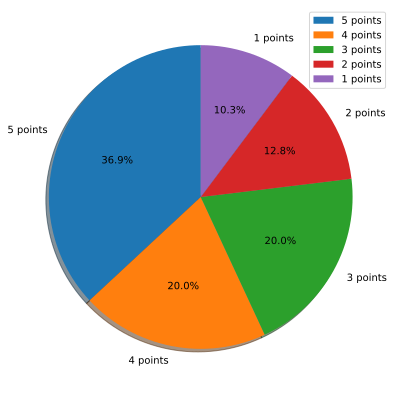

In [18]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Deal satisfaction'].value_counts(), autopct='%1.1f%%', 
        labels=['5 points','4 points', '3 points', '2 points', '1 points'],
        shadow=True, startangle=90)

plt.legend()
plt.show()

Больше половины всех сделок имеют наивысший балл в 5 и 4 пункта, что означает, покупатели в целом довольны сделками.